<a href="https://colab.research.google.com/github/Gabrielwang4/Recommendation-System/blob/main/Recommadation_Syetem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load & Preprocess Data:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import squarify
from scipy.stats import lognorm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

from sklearn.decomposition import TruncatedSVD

In [ ]:
menu = pd.read_csv('menu_containfilledup.csv')
menu.head()

,Series-ID,Name-ID,Unique-ID,Series,Name,Ice_Hot,Calories,Contain,Allergen,Description
0,1,1,1-1,DESSERT COMBO,Icy Taro Ball Combo A,Ice,988,"Taro Balls, Red Beans, Peanuts, Boba, Shaved Ice","Vegan, Gluten-Free, Lactose-Free",Our refreshing Icy Taro Ball is made from the ...
1,1,2,1-2,DESSERT COMBO,Icy Taro Ball Combo B,Ice,828,"Taro Balls, Taro, Red Beans, Boba, Shaved Ice","Vegan, Gluten-Free, Lactose-Free",Our refreshing Icy Taro Ball is made from the ...
2,1,3,1-3,DESSERT COMBO,Icy Taro Ball Combo C,Ice,714,"Taro Balls, Melon Jelly, Rice Balls, Boba, Sha...","Vegan, Gluten-Free, Lactose-Free",Our refreshing Icy Taro Ball is made from the ...
3,1,4,1-4,DESSERT COMBO,Icy Grass Jelly Combo A,Ice,702,"Grass Jelly, Red Beans, Peanuts, Boba, Grass J...","Vegan, Gluten-Free, Lactose-Free","In Icy Grass Jelly Combo A, toppings include o..."
4,1,5,1-5,DESSERT COMBO,Icy Grass Jelly Combo B,Ice,542,"Grass Jelly, Taro, Red Beans, Boba, Grass Jell...","Vegan, Gluten-Free","In Icy Grass Jelly Combo B, toppings include o..."


In [ ]:
customer = pd.read_excel('Group-4 SMOTE G5 Customer Data.xlsx',sheet_name = 'Mock-Up Data (500)')
customer.head()

,user_id,gender,age,ethnicity,sensitivity on price,sensitivity on calorie,sensitivity on seasonal food,hot or cold,current state,Rating
0,1,M,33,Asian,3,4,2,H,AZ,4
1,2,F,21,Hispanic,4,5,3,H,AZ,5
2,3,F,26,Hispanic,4,1,1,H,CA,4
3,4,M,64,Black,5,5,3,C,CA,2
4,5,M,35,Asian,5,1,2,C,CA,1


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       500 non-null    int64 
 1   gender                        500 non-null    object
 2   age                           500 non-null    int64 
 3   ethnicity                     500 non-null    object
 4   sensitivity on price          500 non-null    int64 
 5   sensitivity on calorie        500 non-null    int64 
 6   sensitivity on seasonal food  500 non-null    int64 
 7   hot or cold                   500 non-null    object
 8   current state                 500 non-null    object
 9   Rating                        500 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 39.2+ KB


In [ ]:
customer.describe()

,user_id,age,sensitivity on price,sensitivity on calorie,sensitivity on seasonal food,Rating
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,32.708000,3.00200,3.060000,2.534000,3.228000
std,144.481833,9.851337,1.38051,1.443804,1.085911,1.533858
min,1.000000,15.000000,1.00000,1.000000,1.000000,1.000000
25%,125.750000,27.000000,2.00000,2.000000,2.000000,2.000000
50%,250.500000,31.000000,3.00000,3.000000,3.000000,4.000000
75%,375.250000,35.000000,4.00000,4.000000,3.000000,5.000000
max,500.000000,65.000000,5.00000,5.000000,4.000000,5.000000


In [ ]:
for col in customer.columns:
    print(col)
    print(customer[col].nunique())
    print(customer[col].unique())
    print()

user_id
500
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [ ]:
transaction = pd.read_excel('Group-4 Mock-Up Transaction Data.xlsx', sheet_name = 'Mockup_data (v4)')
transaction.head()

,Record_ID,Date (mm/dd/yyyy),Customer_ID(1:500),Transaction_ID,Unique_ID,TOPPING_ID,Quantity
0,1,2016-02-01,47,1,1-14,NaN,1.0
1,2,2016-02-01,322,2,7-7,NaN,1.0
2,3,2016-02-01,186,3,13-3,NaN,1.0
3,4,2016-02-01,219,4,6-16,NaN,1.0
4,5,2016-02-01,200,5,3-12,NaN,1.0


In [ ]:
for col in transaction.columns:
    print(col)
    print(transaction[col].nunique())
    print(transaction[col].unique())
    print()

Record_ID
131706
[     1      2      3 ... 131704 131705 131706]

Date (mm/dd/yyyy)
363
['2016-02-01T00:00:00.000000000' '2016-03-01T00:00:00.000000000'
 '2016-04-01T00:00:00.000000000' '2016-05-01T00:00:00.000000000'
 '2016-06-01T00:00:00.000000000' '2016-07-01T00:00:00.000000000'
 '2016-08-01T00:00:00.000000000' '2016-09-01T00:00:00.000000000'
 '2016-10-01T00:00:00.000000000' '2016-11-01T00:00:00.000000000'
 '2016-12-01T00:00:00.000000000' '2016-01-13T00:00:00.000000000'
 '2016-01-14T00:00:00.000000000' '2016-01-15T00:00:00.000000000'
 '2016-01-16T00:00:00.000000000' '2016-01-17T00:00:00.000000000'
 '2016-01-18T00:00:00.000000000' '2016-01-19T00:00:00.000000000'
 '2016-01-20T00:00:00.000000000' '2016-01-21T00:00:00.000000000'
 '2016-01-22T00:00:00.000000000' '2016-01-23T00:00:00.000000000'
 '2016-01-24T00:00:00.000000000' '2016-01-25T00:00:00.000000000'
 '2016-01-26T00:00:00.000000000' '2016-01-27T00:00:00.000000000'
 '2016-01-28T00:00:00.000000000' '2016-01-29T00:00:00.000000000'
 '

In [ ]:
transaction_customer = pd.merge(customer, transaction, left_on = 'user_id', right_on = 'Customer_ID(1:500)', how = 'right')

In [ ]:
transaction_customer.drop(columns = ['Customer_ID(1:500)'], inplace = True)
transaction_customer.head()

,user_id,gender,age,ethnicity,sensitivity on price,sensitivity on calorie,sensitivity on seasonal food,hot or cold,current state,Rating,Record_ID,Date (mm/dd/yyyy),Transaction_ID,Unique_ID,TOPPING_ID,Quantity
0,47,F,34,Asian,5,1,3,H,CA,4,1,2016-02-01,1,1-14,NaN,1.0
1,322,M,32,Black,4,4,4,H,CA,5,2,2016-02-01,2,7-7,NaN,1.0
2,186,F,21,Hispanic,3,3,1,C,CA,4,3,2016-02-01,3,13-3,NaN,1.0
3,219,M,27,Black,3,1,2,H,CA,3,4,2016-02-01,4,6-16,NaN,1.0
4,200,M,47,Black,4,3,4,C,CA,4,5,2016-02-01,5,3-12,NaN,1.0


In [ ]:
data = pd.merge(transaction_customer, menu, left_on = 'Unique_ID', right_on = 'Unique-ID', how = 'left')

In [ ]:
data.drop(columns = ['Unique-ID'], inplace = True)
data.head()

,user_id,gender,age,ethnicity,sensitivity on price,sensitivity on calorie,sensitivity on seasonal food,hot or cold,current state,Rating,Record_ID,Date (mm/dd/yyyy),Transaction_ID,Unique_ID,TOPPING_ID,Quantity,Series-ID,Name-ID,Series,Name,Ice_Hot,Calories,Contain,Allergen,Description
0,47,F,34,Asian,5,1,3,H,CA,4,1,2016-02-01,1,1-14,NaN,1.0,1,14,DESSERT COMBO,Hot Almond Soup Combo B,Hot,746,"Taro Balls, Taro, Red Beans, Boba, Almond Flak...","Contains Nuts (Almond), Gluten-Free",Our Seasonal Hot Almond Soup is a perfect wint...
1,322,M,32,Black,4,4,4,H,CA,5,2,2016-02-01,2,7-7,NaN,1.0,7,7,TEAS,Jin Xuan Oolong Tea,Ice,434,Jin Xuan Oolong Tea,NaN,NaN
2,186,F,21,Hispanic,3,3,1,C,CA,4,3,2016-02-01,3,13-3,NaN,1.0,13,3,FLUFFY,Fluffy Oolong Tea,Ice,510,"Fluffy, Oolong Tea",NaN,NaN
3,219,M,27,Black,3,1,2,H,CA,3,4,2016-02-01,4,6-16,NaN,1.0,6,16,TOFU PUDDING,Potaro Ball Tofu Pudding,Ice,422,"Tofu Pudding, Potaro Ball",NaN,NaN
4,200,M,47,Black,4,3,4,C,CA,4,5,2016-02-01,5,3-12,NaN,1.0,3,12,PURPLE RICE SERIES,Purple Rice Drink with Mini Q & Fresh Milk,Hot,873,"Purple Rice Soup, Milk, Tea, Mini Q",NaN,NaN


In [ ]:
data.to_excel('final_data.xlsx')

### Exploratory Data Analysis

In [ ]:
data.shape

(131706, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131706 entries, 0 to 131705
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   user_id                       131706 non-null  int64         
 1   gender                        131706 non-null  object        
 2   age                           131706 non-null  int64         
 3   ethnicity                     131706 non-null  object        
 4   sensitivity on price          131706 non-null  int64         
 5   sensitivity on calorie        131706 non-null  int64         
 6   sensitivity on seasonal food  131706 non-null  int64         
 7   hot or cold                   131706 non-null  object        
 8   current state                 131706 non-null  object        
 9   Rating                        131706 non-null  int64         
 10  Record_ID                     131706 non-null  int64         
 11  Date (mm/dd/y

In [ ]:
data['Unique_ID'].value_counts()

16-1    3622
5-2     3500
13-3    3174
15-3    2919
5-1     2817
        ... 
6-2      139
6-12     132
9-3      117
6-7      112
6-9       77
Name: Unique_ID, Length: 155, dtype: int64

In [ ]:
data.isna().sum()

user_id                              0
gender                               0
age                                  0
ethnicity                            0
sensitivity on price                 0
sensitivity on calorie               0
sensitivity on seasonal food         0
hot or cold                          0
current state                        0
Rating                               0
Record_ID                            0
Date (mm/dd/yyyy)                    0
Transaction_ID                       0
Unique_ID                            0
TOPPING_ID                       88450
Quantity                             0
Series-ID                            0
Name-ID                              0
Series                               0
Name                                 0
Ice_Hot                          14073
Calories                             0
Contain                              0
Allergen                        101861
Description                     107758
dtype: int64

In [ ]:
data['counts'] = data['Unique_ID'].map(data['Unique_ID'].value_counts())

In [ ]:
# Create new column rating according to amount of order for each item
def rating_score(data):
    if data['counts'] >= 2000:
        return 5
    elif ((data['counts'] >= 1500) and (data['counts'] < 2000)):
        return 4
    elif ((data['counts'] >= 1000) and (data['counts'] < 1500)):
        return 3
    elif ((data['counts'] >= 500) and (data['counts'] < 1000)):
        return 2
    else:
        return 1
    
data['rating'] = data.apply(rating_score, axis = 1)
data.head()


,user_id,gender,age,ethnicity,sensitivity on price,sensitivity on calorie,sensitivity on seasonal food,hot or cold,current state,Rating,Record_ID,Date (mm/dd/yyyy),Transaction_ID,Unique_ID,TOPPING_ID,Quantity,Series-ID,Name-ID,Series,Name,Ice_Hot,Calories,Contain,Allergen,Description,counts,rating
0,47,F,34,Asian,5,1,3,H,CA,4,1,2016-02-01,1,1-14,NaN,1.0,1,14,DESSERT COMBO,Hot Almond Soup Combo B,Hot,746,"Taro Balls, Taro, Red Beans, Boba, Almond Flak...","Contains Nuts (Almond), Gluten-Free",Our Seasonal Hot Almond Soup is a perfect wint...,576,2
1,322,M,32,Black,4,4,4,H,CA,5,2,2016-02-01,2,7-7,NaN,1.0,7,7,TEAS,Jin Xuan Oolong Tea,Ice,434,Jin Xuan Oolong Tea,NaN,NaN,1206,3
2,186,F,21,Hispanic,3,3,1,C,CA,4,3,2016-02-01,3,13-3,NaN,1.0,13,3,FLUFFY,Fluffy Oolong Tea,Ice,510,"Fluffy, Oolong Tea",NaN,NaN,3174,5
3,219,M,27,Black,3,1,2,H,CA,3,4,2016-02-01,4,6-16,NaN,1.0,6,16,TOFU PUDDING,Potaro Ball Tofu Pudding,Ice,422,"Tofu Pudding, Potaro Ball",NaN,NaN,816,2
4,200,M,47,Black,4,3,4,C,CA,4,5,2016-02-01,5,3-12,NaN,1.0,3,12,PURPLE RICE SERIES,Purple Rice Drink with Mini Q & Fresh Milk,Hot,873,"Purple Rice Soup, Milk, Tea, Mini Q",NaN,NaN,569,2


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,131706.0,251.540036,145.772458,1.00,126.00,251.0,378.00,500.0
age,131706.0,32.542117,9.806544,15.00,26.00,31.0,35.00,65.0
sensitivity on price,131706.0,3.015808,1.381782,1.00,2.00,3.0,4.00,5.0
sensitivity on calorie,131706.0,3.083375,1.436838,1.00,2.00,3.0,4.00,5.0
sensitivity on seasonal food,131706.0,2.539087,1.086353,1.00,2.00,3.0,3.00,4.0
Rating,131706.0,3.234697,1.526736,1.00,2.00,4.0,5.00,5.0
Record_ID,131706.0,65853.500000,38020.391614,1.00,32927.25,65853.5,98779.75,131706.0
Transaction_ID,131706.0,32389.604187,18709.901238,1.00,16134.00,32620.0,48548.00,64682.0
Quantity,131706.0,1.485311,3.872667,0.01,1.00,1.0,1.00,400.0
Series-ID,131706.0,9.488945,5.155308,1.00,5.00,9.0,14.00,18.0


KeyError: "['age'] not in index"

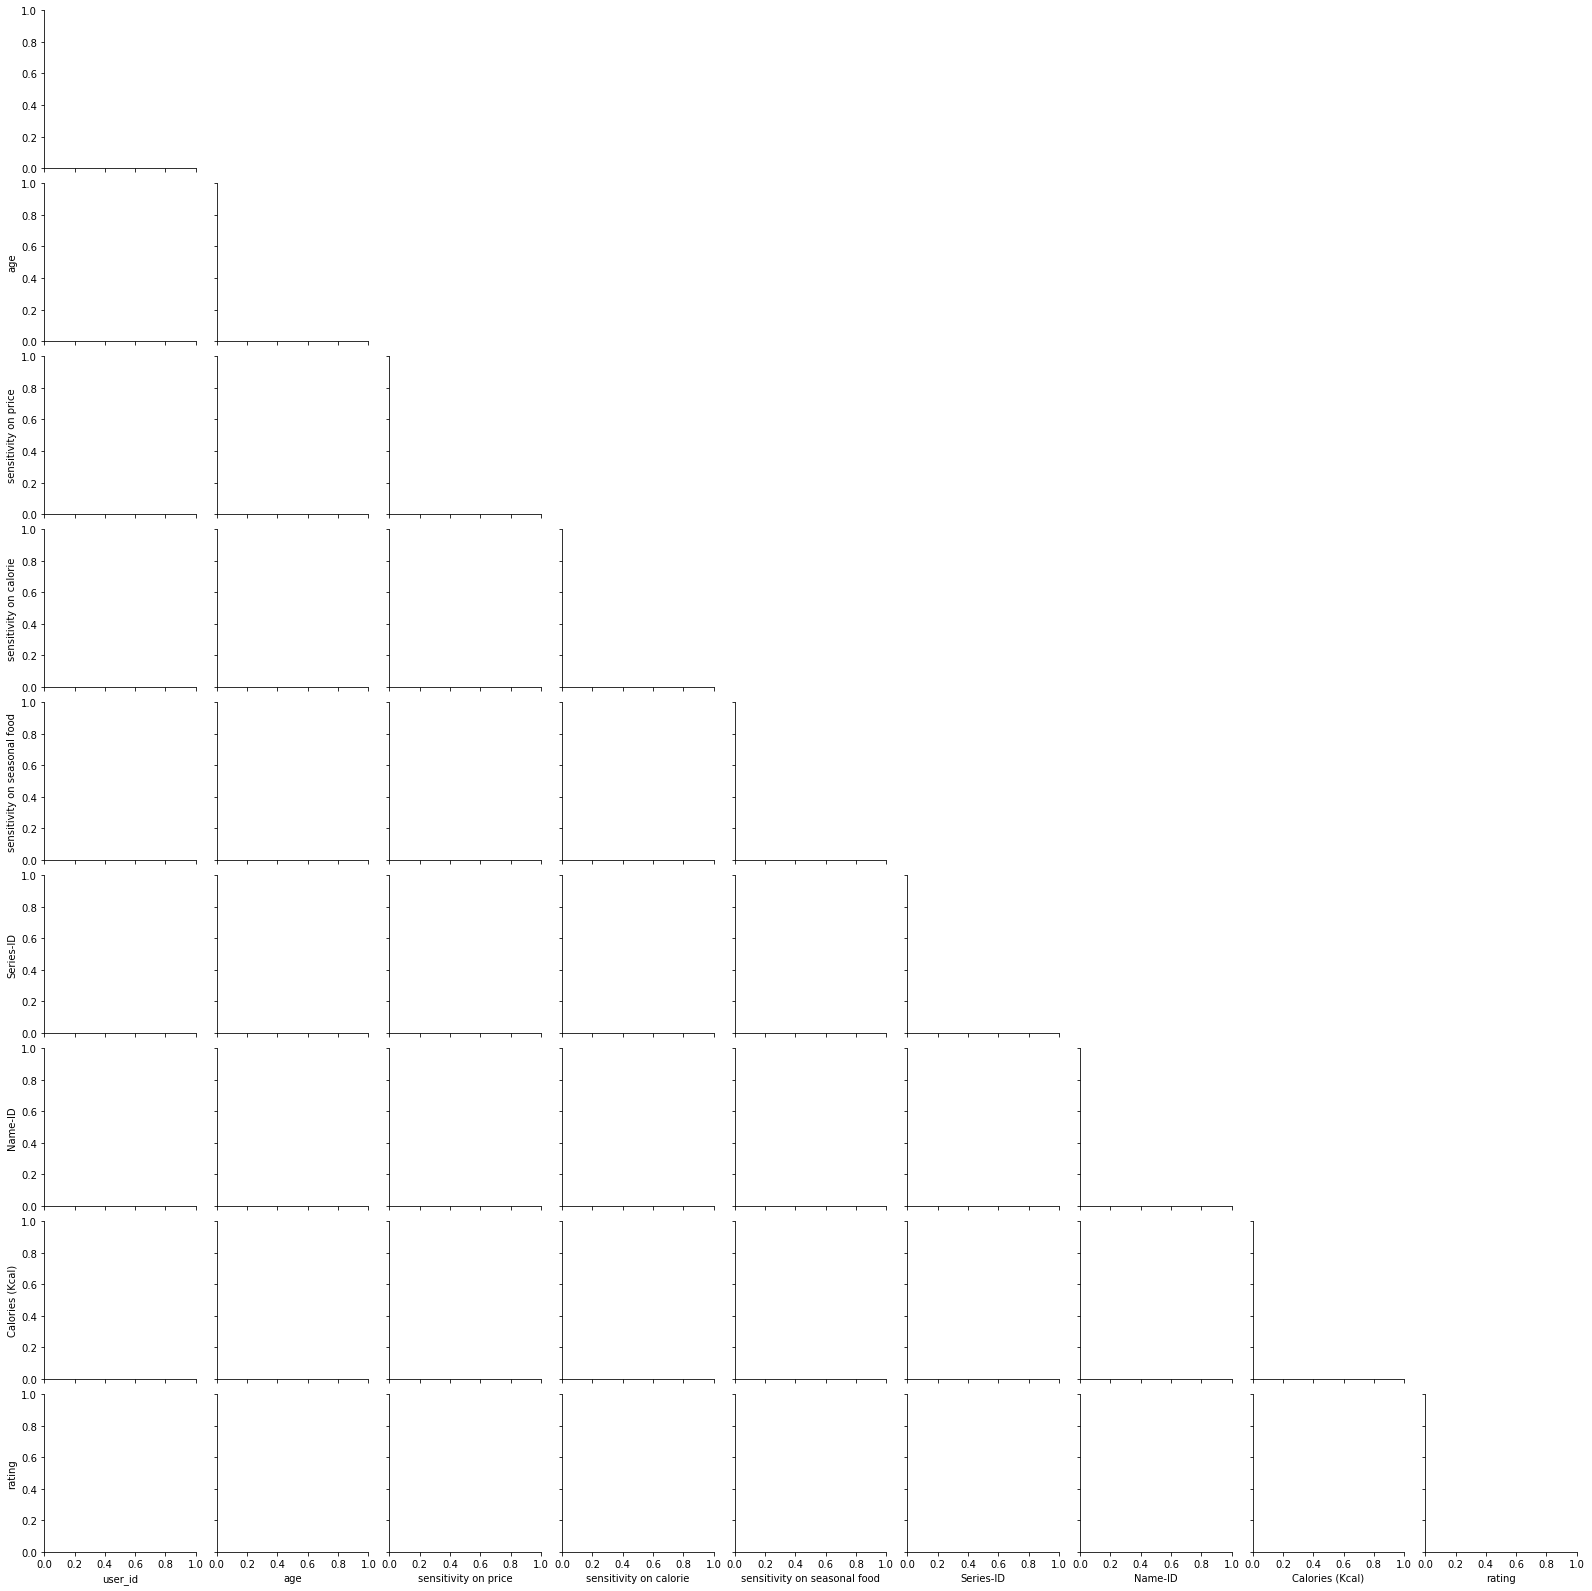

In [ ]:
# drop columns 'Record_ID', 'counts'. 'Record_ID' is just interge that is not meaningful here. 'counts' is related to 'rating', keep 'raring'.
g = sns.PairGrid(data, vars = ['user_id', 'age', 'sensitivity on price', 'sensitivity on calorie', 
                               'sensitivity on seasonal food', 'Series-ID', 'Name-ID', 'Calories (Kcal)', 'rating'],
                diag_sharey = False, corner = True, hue = 'ethnicity')
g.map_lower(sns.scatterplot)
g.map_diag(sns.distplot)
g.add_legend()

In [ ]:
# correlation
data.corr()

,user_id,age,sensitivity on price,sensitivity on calorie,sensitivity on seasonal food,Rating,Record_ID,Transaction_ID,Quantity,Series-ID,Name-ID,Calories,counts,rating
user_id,1.000000,0.037425,0.055827,0.032901,0.031875,0.136693,0.000345,0.000132,-0.000005,-0.001160,-0.001728,-0.002006,0.005805,0.006878
age,0.037425,1.000000,0.010398,-0.011571,-0.033315,-0.000218,-0.010057,-0.009626,-0.001638,0.000065,0.000102,0.000601,0.000986,0.002364
sensitivity on price,0.055827,0.010398,1.000000,0.007742,0.052349,0.000304,-0.010209,-0.007739,-0.008565,-0.006004,0.006296,0.006332,-0.001127,-0.001938
sensitivity on calorie,0.032901,-0.011571,0.007742,1.000000,-0.023697,-0.073966,0.005853,0.003755,-0.001388,-0.003705,-0.002399,-0.008618,-0.001204,-0.002359
sensitivity on seasonal food,0.031875,-0.033315,0.052349,-0.023697,1.000000,0.062691,-0.003070,-0.000686,0.003827,-0.001275,-0.003617,0.003816,-0.003322,-0.001348
Rating,0.136693,-0.000218,0.000304,-0.073966,0.062691,1.000000,0.004484,0.006253,0.003311,-0.003414,0.003250,0.002370,0.000746,0.001321
Record_ID,0.000345,-0.010057,-0.010209,0.005853,-0.003070,0.004484,1.000000,0.944655,0.001973,-0.001901,0.002693,-0.005155,-0.004713,-0.004041
Transaction_ID,0.000132,-0.009626,-0.007739,0.003755,-0.000686,0.006253,0.944655,1.000000,0.002736,-0.000282,0.000651,-0.008118,-0.003498,-0.002610
Quantity,-0.000005,-0.001638,-0.008565,-0.001388,0.003827,0.003311,0.001973,0.002736,1.000000,0.016229,-0.016395,-0.010357,0.023389,0.024433
Series-ID,-0.001160,0.000065,-0.006004,-0.003705,-0.001275,-0.003414,-0.001901,-0.000282,0.016229,1.000000,-0.251660,-0.408851,0.272538,0.281110


<AxesSubplot:>

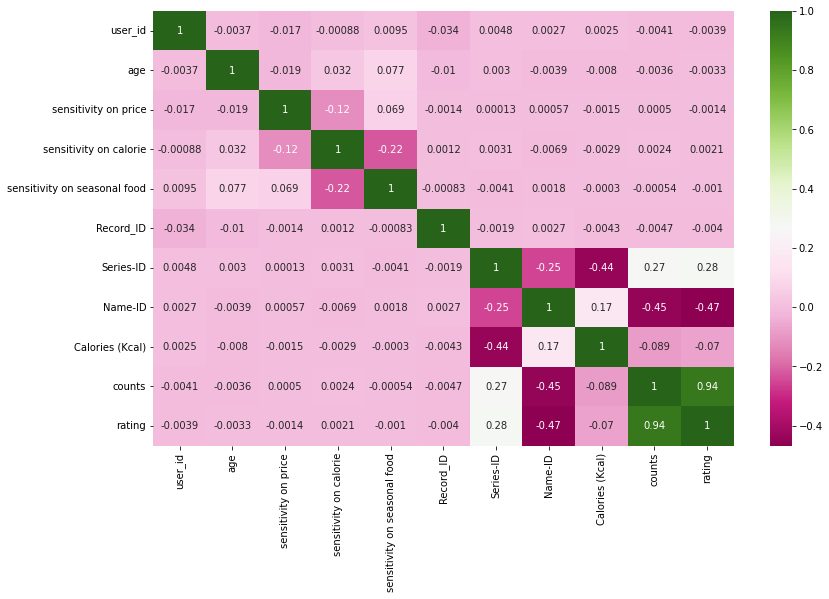

In [ ]:
# heatmap
plt.figure(figsize = (13, 8))
sns.heatmap(data = data.corr(), cmap = 'PiYG', annot = True)

## Recommendation System 1
### Popularity based recommendation system
It works on the principle of popularity and or anything which is in trend. It targets at new customers.

In [ ]:
popular_item = pd.DataFrame(data.groupby(['Unique_ID', 'Name'])['rating'].count())
most_popular_item = popular_item.sort_values('rating', ascending = False)
most_popular_item.head(10)

,,rating
Unique_ID,Name,
16-1,Hot Almond Drink,3622
5-2,Mini Q & Melon Jelly,3500
13-3,Fluffy Oolong Tea,3174
15-3,Coffee Smoothie,2919
5-1,Creamy Milk,2817
13-7,Fluffy Mini Q (Mini Taro Ball) Winter Melon Tea,2707
12-2,Mixed Fruit Green Tea Slush,2656
5-3,Boba & Caramel Pudding,2360
16-3,Mini Q (Mini Taro Ball) Hot Almond Drink,2331


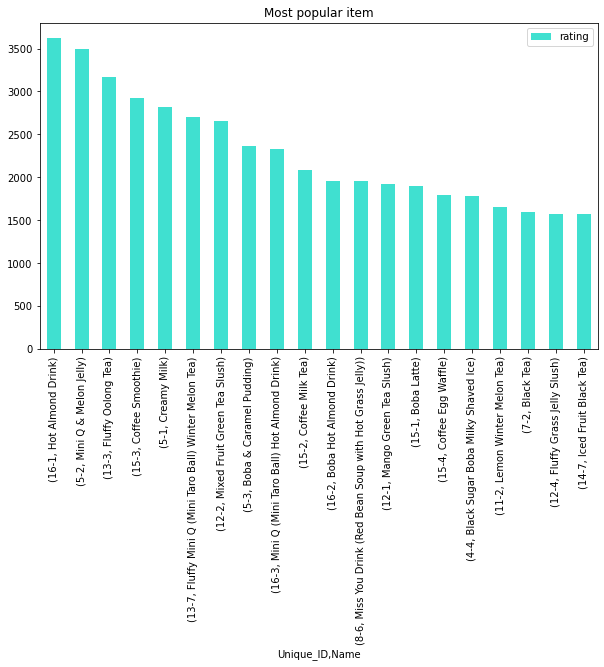

In [ ]:
most_popular_item.head(20).plot(kind = 'bar', title = 'Most popular item', figsize = (10, 6), color = 'turquoise')
plt.show()

In [ ]:
popular_topping = pd.DataFrame(data.groupby('TOPPING_ID')['rating'].count())
most_popular_topping = popular_topping.sort_values('rating', ascending = False)
most_popular_topping.head(5)

,rating
TOPPING_ID,
19-20,3560
19-3,3037
19-14,2799
19-1,2620
19-15,2419


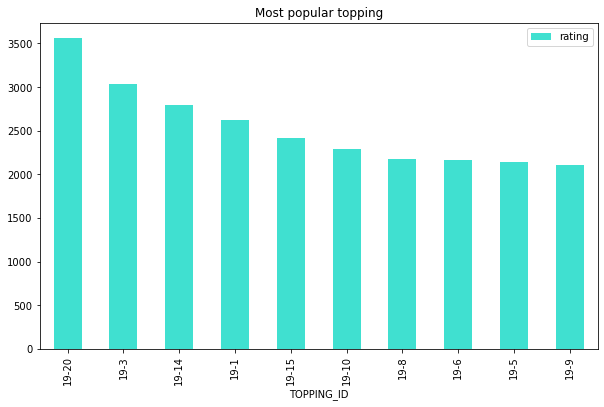

In [ ]:
most_popular_topping.head(10).plot(kind = 'bar', title = 'Most popular topping', figsize = (10, 6), color = 'turquoise')
plt.show()

In [ ]:
popular_location = pd.DataFrame(data.groupby('current state')['rating'].count())
most_popular_location = popular_location.sort_values('rating', ascending = False)
most_popular_location.head(10)

,rating
current state,
CA,88451
TX,8574
NY,7974
NV,5979
IL,5942
WA,5621
GA,2485
UT,2371
NC,1683


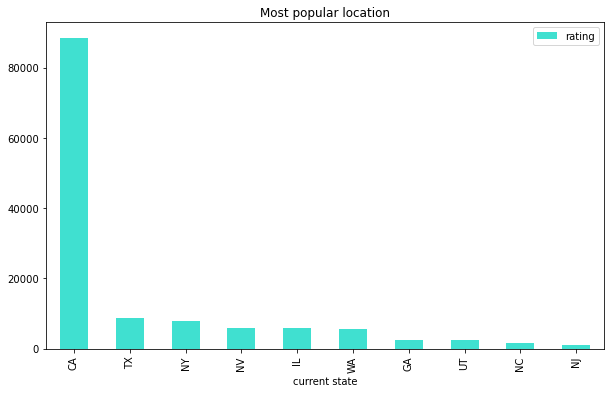

In [ ]:
most_popular_location.head(10).plot(kind = 'bar', title = 'Most popular location', figsize = (10, 6), color = 'turquoise')
plt.show()

#### California has the dominant position among all of meet fresh stores in U.S., Nevada and New York are followed.

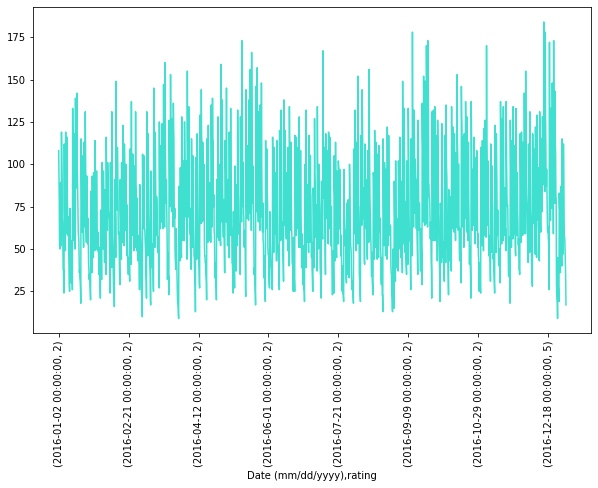

In [ ]:
data.groupby('Date (mm/dd/yyyy)')['rating'].value_counts().plot(figsize = (10, 6), color = 'turquoise')
plt.xticks(rotation = 90)
plt.show()

#### There is no obvious selling trend related to the time period of the year. 

## Recommendation System 2
### Association rule learning recommendation system  
Association Rule Learning is a rule-based machine learning technique used to find patterns in data. It gives advice based on people's purchasing habits. So if somebody bought x and y items together in the past, the system gives advice in the future to a person who is planning to buy either x or y.  
Apriori Algorithm is a basket analysis method. It is used to reveal product associations/relations.  
Support(X,Y) = Freq(X,Y)/N  
Confidence(X,Y) = Freq(X,Y)/Freq(X)  
Lift = Support(X,Y)/(Support(X)*Support(Y))  

In [ ]:
data.groupby(['Transaction_ID', 'Name']).agg({'Quantity': 'sum'}).tail(10)

Quantity
Transaction_ID Name                                                        
64676          Fluffy Oolong Tea                                        1.0
               Miss You Drink (Red Bean Soup with Hot Grass Je...       1.0
64677          Fluffy Mini Q (Mini Taro Ball) Winter Melon Tea          1.0
               Hot Almond Soup Combo C                                  1.0
64678          Fluffy Oolong Tea                                        1.0
64679          Hot Almond Drink                                         1.0
               Icy Grass Jelly Signature                                1.0
64680          Iced Fruit Black Tea                                     1.0
64681          Hot Red Bean Soup Combo B                                1.0
64682          Iced Fruit Black Tea                                     1.0

In [ ]:
# for better appearance, use 'unstack'
data.groupby(['Transaction_ID', 'Name']).agg({'Quantity': 'sum'}).unstack().iloc[0:5, 0:5]

Quantity                              \
Name           Black Milk Tea Black Sugar Boba Fresh Milk   
Transaction_ID                                              
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
5                         NaN                         NaN   

                                                                            \
Name           Black Sugar Boba Milk Tea Black Sugar Boba Milky Shaved Ice   
Transaction_ID                                                               
1                                    NaN                               NaN   
2                                    NaN                               NaN   
3                                    NaN                               NaN   
4                                    NaN                               NaN   
5                                    NaN                               NaN   

                          
Name           Black Tea  
Transaction_ID            
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN

In [ ]:
# Create a function to generate transaction-item matrix
def transaction_item_matrix(dataframe, id = False):
    if id:
        return dataframe.groupby(['Transaction_ID', 'Unique_ID'])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Transaction_ID', 'Name'])['Quantity'].sum().unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)

df = transaction_item_matrix(data)
df.head()

Name,Black Milk Tea,Black Sugar Boba Fresh Milk,Black Sugar Boba Milk Tea,Black Sugar Boba Milky Shaved Ice,Black Tea,Boba & Caramel Pudding,Boba Caramel Pudding,Boba Fresh Milk Tea,Boba Hot Almond Drink,Boba Latte,Boba Milk Tea,Boba Tofu Pudding,Chocolate,Chocolate Chips,Chocolate Deluxe,Coated Popcorn: Brown Sugar,Coated Popcorn: Salted Egg Yolk,Coated Popcorn: Thirteen Spices,Coffee Egg Waffle,Coffee Milk Tea,Coffee Smoothie,Cold Purple Rice Soup Signature,Creamy Milk,Double Taro Signature,Fluffy Black Tea,Fluffy Grass Jelly Slush,Fluffy Green Tea,Fluffy Herbal Tea,Fluffy Jin Xuan Tea,Fluffy Mini Q (Mini Taro Ball) Winter Melon Tea,Fluffy Oolong Tea,Fluffy Winter Melon Tea,Fresh Milk & Grass Jelly Herbal Tea,Fresh Milk Black Tea,Fresh Milk Green Tea,Fresh Milk Herbal Tea,Fresh Milk Jin Xuan Tea,Fresh Milk Oolong Tea,Fresh Milk Winter Melon Tea,Grass Jelly Milk Tea,Grass Jelly Winter Melon Tea,Herbal Tea,Hot Almond Drink,Hot Almond Purple Rice Soup,Hot Almond Soup Combo A,Hot Almond Soup Combo B,Hot Almond Soup Combo C,Hot Almond Soup Signature,Hot Almond Soup Tofu Pudding,Hot Grass Jelly Soup Combo A,Hot Grass Jelly Soup Combo B,Hot Grass Jelly Soup Combo C,Hot Grass Jelly Soup Signature,Hot Purple Rice Soup Signature,Hot Red Bean Soup Combo A,Hot Red Bean Soup Combo B,Hot Red Bean Soup Combo C,Hot Red Bean Soup Signature,Iced Fruit Black Tea,Iced Lemon Black Tea,Icy Grass Jelly Combo A,Icy Grass Jelly Combo B,Icy Grass Jelly Combo C,Icy Grass Jelly Signature,Icy Taro Ball Combo A,Icy Taro Ball Combo B,Icy Taro Ball Combo C,Icy Taro Ball Signature,Jasmine Green Milk Tea,Jasmine Green Tea,Jin Xuan Oolong Milk Tea,Jin Xuan Oolong Tea,Lemon Winter Melon Tea,Mango & Orange Green Tea,Mango & Passion Fruit Green Tea,Mango Green Tea,Mango Green Tea Slush,Mango Milk Shaved Ice,Mangoberry Milk Shaved Ice,Matcha,Matcha Deluxe,Matcha Red Bean,Mini Q Tofu Pudding,Mini Q & Black Sugar Boba Fresh Milk,Mini Q & Melon Jelly,Mini Q (Mini Taro Ball) Hot Almond Drink,Mini Q (Mini Taro Ball) Milk Tea,Mini Q (Mini Taro Ball) Winter Melon Tea,Miss You Drink (Red Bean Soup with Hot Grass Jelly),Mixed Fruit Green Tea Slush,Mung Bean Cakes,Oolong Milk Tea,Oolong Tea,Orange & Passion Fruit Green Tea,Original,Passion Fruit Green Tea,Peanut Tofu Pudding,Plain Tofu Pudding,Potaro Ball Tofu Pudding,Pudding & Q Mochi Milk Shaved Ice,Pudding Milk Tea,Purple Rice Drink with Boba & Fresh Milk,Purple Rice Drink with Mini Q & Fresh Milk,Purple Rice Milk Tea,Purple Rice Soup Combo A,Purple Rice Soup Combo B,Purple Rice Soup Combo C,Purple Rice with Fresh Milk,Q Mochi,Q Mochi & Almond Pudding,Q Mochi & Caramel Pudding,Q Mochi Milk Shaved Ice,QQ Winter Melon Tea,Red Bean Almond Pudding,Red Bean Milk Shaved Ice,Red Bean Tofu Pudding,Rice Ball Tofu Pudding,Strawberry Milk Shaved Ice,Strawberry Smoothie,Taro Ball Tofu Pudding,Taro Paste Fresh Milk Tea,Taro Paste Volcano Shaved Ice,Taro Tofu Pudding,Win Win (Boba & Lychee) Milk Tea,Winter Melon Tea
Transaction_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
df = transaction_item_matrix(data, id = True)
df.head()

Unique_ID,1-1,1-10,1-11,1-12,1-13,1-14,1-15,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,10-1,10-10,10-11,10-12,10-13,10-2,10-3,10-4,10-5,10-6,10-7,10-8,10-9,11-1,11-2,11-3,11-4,11-5,11-6,12-1,12-2,12-3,12-4,13-1,13-2,13-3,13-4,13-5,13-6,13-7,14-1,14-2,14-3,14-4,14-5,14-6,14-7,15-1,15-2,15-3,15-4,16-1,16-2,16-3,17-1,17-2,17-3,17-4,17-5,17-6,17-7,18-1,18-2,18-3,18-4,18-5,18-6,18-7,18-8,18-9,2-1,2-2,2-3,2-4,2-5,2-6,3-1,3-10,3-11,3-12,3-13,3-14,3-2,3-3,3-4,3-5,3-6,3-7,3-8,3-9,4-1,4-2,4-3,4-4,4-5,4-6,4-7,4-8,5-1,5-2,5-3,6-1,6-10,6-11,6-12,6-13,6-14,6-15,6-16,6-17,6-18,6-2,6-3,6-4,6-5,6-6,6-7,6-8,6-9,7-1,7-2,7-3,7-4,7-5,7-6,7-7,7-8,8-1,8-2,8-3,8-4,8-5,8-6,9-1,9-10,9-11,9-12,9-13,9-14,9-15,9-16,9-17,9-2,9-3,9-4,9-5,9-6,9-7,9-8,9-9
Transaction_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Unique_ID
def check_id(dataframe, uniqueid):
    
    try:
        for x in uniqueid:
            item_name = dataframe[dataframe['Unique_ID'] == x][['Name']].values[0].tolist()
            print(item_name)
    except:
        item_name = dataframe[dataframe['Unique_ID'] == uniqueid][['Name']].values[0].tolist()
        print(item_name)

check_id(data, '1-10')

['Hot Red Bean Soup Combo A']


In [ ]:
# Build the model
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# rule out the probability of all possible item associations
frequent_itemsets = apriori(df, min_support = 0.001, use_colnames = True)
frequent_itemsets.sort_values('support', ascending = False).head(10)

,support,itemsets
56,0.053925,(16-1)
104,0.052890,(5-2)
40,0.048298,(13-3)
54,0.044572,(15-3)
103,0.042933,(5-1)
44,0.041542,(13-7)
35,0.038743,(12-2)
105,0.035342,(5-3)
58,0.035311,(16-3)
53,0.031554,(15-2)


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.tail(10)

,support,itemsets,length
419,0.001129,"(5-2, 7-2)",2
420,0.001268,"(5-2, 8-3)",2
421,0.001129,"(5-2, 8-5)",2
422,0.001701,"(5-2, 8-6)",2
423,0.001252,"(7-4, 5-3)",2
424,0.001082,"(7-5, 5-3)",2
425,0.001005,"(7-7, 5-3)",2
426,0.001098,"(8-6, 5-3)",2
427,0.001206,"(9-6, 5-3)",2
428,0.001005,"(8-3, 7-4)",2


In [ ]:
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)
rules.sort_values('support', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
123,(12-2),(5-1),0.038743,0.042933,0.003293,0.084996,1.979731,0.001630,1.045970
122,(5-1),(12-2),0.042933,0.038743,0.003293,0.076701,1.979731,0.001630,1.041111
103,(12-2),(16-1),0.038743,0.053925,0.003154,0.081405,1.509580,0.001065,1.029914
102,(16-1),(12-2),0.053925,0.038743,0.003154,0.058486,1.509580,0.001065,1.020969
185,(13-3),(16-1),0.048298,0.053925,0.002876,0.059539,1.104101,0.000271,1.005969


In [ ]:
rules.sort_values('lift', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(10-12),(13-6),0.010266,0.020361,0.001005,0.097892,4.807762,0.000796,1.085944
7,(13-6),(10-12),0.020361,0.010266,0.001005,0.049355,4.807762,0.000796,1.041118
242,(9-6),(13-6),0.012430,0.020361,0.001098,0.088308,4.337105,0.000845,1.074529
243,(13-6),(9-6),0.020361,0.012430,0.001098,0.053910,4.337105,0.000845,1.043844
292,(4-7),(14-1),0.015259,0.021227,0.001314,0.086120,4.057090,0.000990,1.071008


In [ ]:
# Making item suggestions to customers at the basket stage. For example, there is item name 'Mango Green Tea Slush' in the customer's basket. When we are choosing, we will choose the one with the most support with this item.
Unique_ID = '5-2'
check_id(data, Unique_ID)
sorted_rules = rules.sort_values('lift', ascending = False)
recommendation_list = []
for i, item in enumerate(sorted_rules['antecedents']):
    for j in list(item):
        if j == Unique_ID:
            recommendation_list.append(list(sorted_rules.iloc[i]['consequents'])[0])
        
recommendation_list[0:5]

['Mini Q & Melon Jelly']


['1-11', '18-2', '8-5', '4-8', '2-5']

In [ ]:
# Display item name recommended
check_id(data, ['1-11', '18-2', '8-5', '4-8', '2-5'])

['Hot Red Bean Soup Combo B']
['Red Bean Almond Pudding']
['Fresh Milk & Grass Jelly Herbal Tea']
['Mangoberry Milk Shaved Ice']
['Hot Grass Jelly Soup Signature']


#### Antecendets = First product
#### Consequents = Next incoming product
#### Antecedent support = Possibility of observing the first product alone
#### Consequent support = Probability of observing the second product alone
#### Support = Probability of two products being observed together
#### Confidence = Possibility of purchasing item 2 when item 1 is purchased
#### Lift = How many times increase the probability of purchasing the 2nd product when the 1st product is purchased

## Recommendation System 3
### Customer segmentation based recommendation system
#### RFM Model
RFM (Recency/Retention, Frequency and Monetary) is a method used for segmenting and analyzing customer lifetime value. It is used in direct-to-consumer marketing, retail stores, e-commence companies & professional service companies to derive the engagement strength and the likelihood of customers staying with the company for the long term. 
#### The benefits of RFM Model
It helps you to answer the following questions:
1. Identify top customers
2. Customers contribution to churn
3. Potential/Valuable customers/Customer lifecycle value
4. Customers can be retained
5. Prediction of customer engagement campaigns

In [ ]:
data_RFM = data.copy()
data_RFM.head()

,user_id,gender,age,ethnicity,sensitivity on price,sensitivity on calorie,sensitivity on seasonal food,hot or cold,current state,Record_ID,...,Name-ID,Series,Name,Ice_Hot,Calories (Kcal),Contain,Allergen,Description,counts,rating
0,2547,F,23,Asian,4,4,4,C,CA,1,...,14.0,DESSERT COMBO,Hot Almond Soup Combo B,Hot,746.0,"Taro Balls, Taro, Red Beans, Boba, Almond Flak...","Contains Nuts (Almond), Gluten-Free",Our Seasonal Hot Almond Soup is a perfect wint...,576,2
1,822,F,26,White,2,2,2,C,CA,2,...,7.0,TEAS,Jin Xuan Oolong Tea,Ice,434.0,NaN,NaN,NaN,1206,3
2,3686,M,23,Asian,4,2,3,H,CA,3,...,3.0,FLUFFY,Fluffy Oolong Tea,Ice,510.0,NaN,NaN,NaN,3174,5
3,3719,F,53,Asian,1,4,2,C,CA,4,...,16.0,TOFU PUDDING,Potaro Ball Tofu Pudding,Ice,422.0,NaN,NaN,NaN,816,2
4,9200,F,23,White,3,4,4,C,TX,5,...,12.0,PURPLE RICE SERIES,Purple Rice Drink with Mini Q & Fresh Milk,Hot,873.0,NaN,NaN,NaN,569,2


In [ ]:
# Create snapshot date
snapshot_date = data_RFM['Date (mm/dd/yyyy)'].max() + datetime.timedelta(days = 1)
print(snapshot_date)
# Grouping by user_id
data_rfm = data_RFM.groupby('user_id').agg({'Date (mm/dd/yyyy)': lambda x: (snapshot_date - x.max()).days,
                                           'Unique_ID': 'count'})
# Rename the columns
data_rfm.rename(columns = {'Date (mm/dd/yyyy)': 'Recency',
                          'Unique_ID': 'Frequency'}, inplace = True)

2017-01-01 00:00:00


In [ ]:
# I create 'Monetary' columns by using 'sensitivity on price'. I assume that a person is willing to spend money on item as 1 if 'sensitivity on price' is 4, and so on.
  
def monetary_score(data):
    if data['sensitivity on price'] == 1:
        return 4
    elif data['sensitivity on price'] == 2:
        return 3
    elif data['sensitivity on price'] == 3:
        return 2
    else:
        return 1
    
data_rfm['Monetary'] = data_RFM.apply(monetary_score, axis = 1)
data_rfm.head()


,Recency,Frequency,Monetary
user_id,,,
1,85,10,3
2,20,30,1
3,4,56,4
4,55,32,2
5,101,11,2


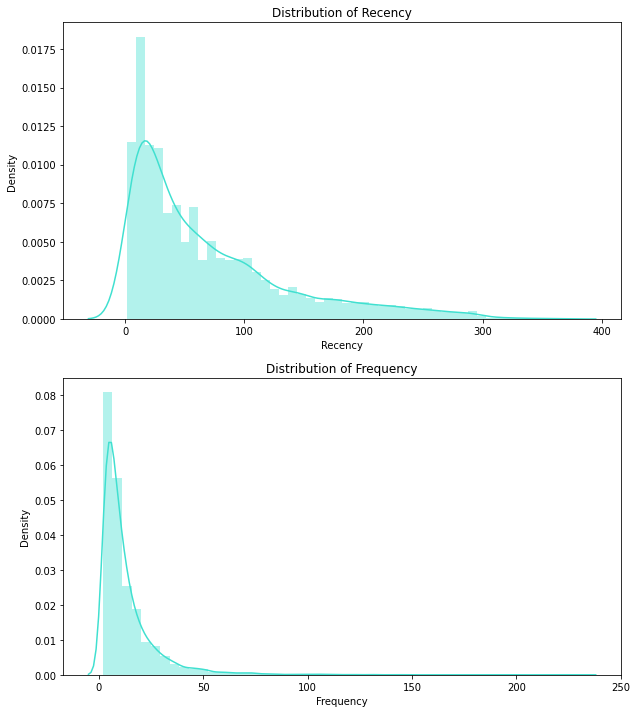

In [ ]:
# Examine the distribution of our Recency, Frequency, and Monetary
fig, axes = plt.subplots(2, 1, figsize = (10, 12))
sns.distplot(data_rfm['Recency'], ax = axes[0], color = 'turquoise')
axes[0].set_title('Distribution of Recency')
sns.distplot(data_rfm['Frequency'], ax = axes[1], color = 'turquoise')
axes[1].set_title('Distribution of Frequency')
plt.show()

In [ ]:
# Create labels for recency (R) amd Frequency (F) groups
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(data_rfm['Recency'], q = 4, labels = r_labels)
f_groups = pd.qcut(data_rfm['Frequency'], q = 4, labels = f_labels)
# Create new columns R and F
data_rfm = data_rfm.assign(R = r_groups.values, F = f_groups.values)
data_rfm['M'] = data_rfm['Monetary']
data_rfm.head()

,Recency,Frequency,Monetary,R,F,M
user_id,,,,,,
1,85,10,3,2,3,3
2,20,30,1,3,4,1
3,4,56,4,4,4,4
4,55,32,2,2,4,2
5,101,11,2,1,3,2


In [ ]:
# Contac RFM quartile values to create RFM segments
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
data_rfm['RFM_Segment_Concat'] = data_rfm.apply(join_rfm, axis = 1)
data_rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat
user_id,,,,,,,
1,85,10,3,2,3,3,233
2,20,30,1,3,4,1,341
3,4,56,4,4,4,4,444
4,55,32,2,2,4,2,242
5,101,11,2,1,3,2,132


In [ ]:
rfm_count_unique = data_rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

64


In [ ]:
# Calculate RFM_score
data_rfm['RFM_Score'] = data_rfm[['R', 'F', 'M']].sum(axis = 1)
# Define rfm_level function
def rfm_level(data):
    if data['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((data['RFM_Score'] >= 8) and (data['RFM_Score'] < 9)):
        return 'Champions'
    elif ((data['RFM_Score'] >= 7) and (data['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((data['RFM_Score'] >= 6) and (data['RFM_Score'] < 7)):
        return 'Potential'
    elif ((data['RFM_Score'] >= 5) and (data['RFM_Score'] < 6)):
        return 'Promising'
    elif ((data['RFM_Score'] >= 4) and (data['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
data_rfm['RFM_Level'] = data_rfm.apply(rfm_level, axis = 1)
data_rfm.head()
    

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
user_id,,,,,,,,,
1,85,10,3,2,3,3,233,8,Champions
2,20,30,1,3,4,1,341,8,Champions
3,4,56,4,4,4,4,444,12,Can't Loose Them
4,55,32,2,2,4,2,242,8,Champions
5,101,11,2,1,3,2,132,6,Potential


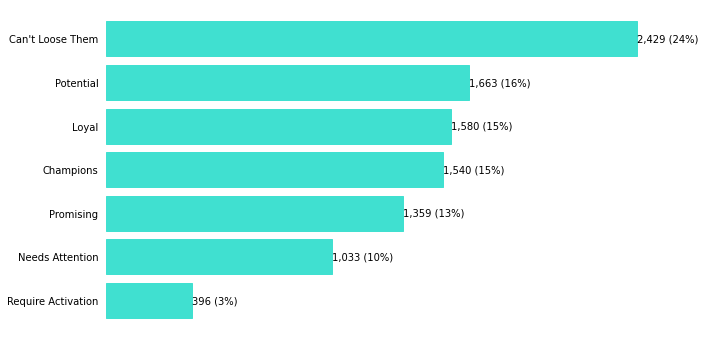

In [ ]:
segments_counts = data_rfm['RFM_Level'].value_counts().sort_values(ascending = True)
fig, ax = plt.subplots(figsize = (10, 6))
bars = ax.barh(range(len(segments_counts)), segments_counts)
ax.set_frame_on(False)
ax.tick_params(left = False, bottom = False, labelbottom = False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate (bars):
    value = bar.get_width()
    if segments_counts.index[i] in ['Can\'t Loose Them', 'Champions', 'Loyal', 'Potential', 'Promising', 'Needs Attention', 'Require Activation']:
        bar.set_color('turquoise')
    ax.text(value, bar.get_y() + bar.get_height()/2, 
            '{:,} ({:}%)'.format(int(value), int(value*100/segments_counts.sum())), va = 'center', ha = 'left')
plt.show()


1. Recommend more trendy, newly released and relatively expensive products to 'Can't Loose Them', 'Champions' and 'Loyal' groups. Aim to increase Monetary in these groups.

2. Potential: high potential to enter loyal customer segments, you can decide to take an appropriate calls like giving them extra discounts or freebies or make them eligible for elite customer club!

3. Promising: showing promising signs with quantity and value of their purchase but it has been a while since they last bought some time from you. You can target them as per their wishlist and throw some limited-time discounts or bundling offers.

4. Needs Attention: made some initial purchases but have not seen them since. Was it a bad customer experience? Or iproduct-market fit? Let's spend some resources building our brand awareness with them.

5. Require Activation: poorest performers of our RFM model. They might have gone with our competitors for now and will require a different activation strategy to win them back.


## Recommendation System 4
### Collaborative filtering system
It relies on the assumption that similar users like similar items. Similarity measures between users and/or items are used to make recommendations. Matrix factorization is a very popular collaborative filtering technique.  
A recommender system has two entities - users and items. Let's say we have m users and n items. The goal of our recommendation system is to build an mxn matrix (called utility matrix) which consists of the rating (or preference) for each user-item pair. Initially, this matrix is usually very sparse because we only  ratings for a limited number of user-item pairs.
Our goal is to populate this matrix by finding similarities between users and items.


In [ ]:
data_matrix = data.copy()

In [ ]:
data_matrix.columns

Index(['user_id', 'gender', 'age', 'ethnicity', 'sensitivity on price',
       'sensitivity on calorie', 'sensitivity on seasonal food', 'hot or cold',
       'current state', 'Record_ID', 'Date (mm/dd/yyyy)', 'Unique_ID',
       'TOPPING_ID', 'Series-ID', 'Name-ID', 'Series', 'Name', 'Ice_Hot',
       'Calories (Kcal)', 'Contain', 'Allergen', 'Description', 'counts',
       'rating'],
      dtype='object')

In [ ]:
rating_utility_matrix = data_matrix.pivot_table(values = 'rating', index = 'user_id', columns = 'Unique_ID', fill_value = 0)
rating_utility_matrix.head()

Unique_ID,1-1,1-10,1-11,1-12,1-13,1-14,1-15,1-2,1-3,1-4,...,9-16,9-17,9-2,9-3,9-4,9-5,9-6,9-7,9-8,9-9
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,0,2,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [ ]:
rating_utility_matrix.shape

(10000, 155)

In [ ]:
rating_utility_matrix_T = rating_utility_matrix.T
rating_utility_matrix_T.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
Unique_ID,,,,,,,,,,,,,,,,,,,,,
1-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1-11,0,0,0,2,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Decomposing the Matrix (Singular value decomposition)
SVD = TruncatedSVD(n_components = 5)
decomposed_matrix = SVD.fit_transform(rating_utility_matrix_T)
decomposed_matrix.shape

(155, 5)

In [ ]:
# Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(155, 155)

In [ ]:
# Isolating item id 1-5 from the Correlation Matrix
rating_utility_matrix_T.index[10]

'1-5'

In [ ]:
ind = '1-5'

item = list(rating_utility_matrix_T.index)
Unique_ID = item.index(ind)
Unique_ID

10

In [ ]:
correlation_Unique_ID = correlation_matrix[Unique_ID]
correlation_Unique_ID.shape

(155,)

In [ ]:
# Recommending top 10 highly correlated items in sequence
recommend = list(rating_utility_matrix_T.index[correlation_Unique_ID > 0.90])
recommend.remove(ind)
recommend[0:10]
   

['1-1', '1-10', '1-11', '1-12', '1-13', '1-14', '1-15', '1-2', '1-3', '1-4']

# Repeat Purchase Recommender System

## RCP

In [ ]:
data

,user_id,gender,age,ethnicity,sensitivity on price,sensitivity on calorie,sensitivity on seasonal food,hot or cold,current state,Rating,Record_ID,Date (mm/dd/yyyy),Transaction_ID,Unique_ID,TOPPING_ID,Quantity,Series-ID,Name-ID,Series,Name,Ice_Hot,Calories,Contain,Allergen,Description,counts,rating
0,47,F,34,Asian,5,1,3,H,CA,4,1,2016-02-01,1,1-14,NaN,1.0,1,14,DESSERT COMBO,Hot Almond Soup Combo B,Hot,746,"Taro Balls, Taro, Red Beans, Boba, Almond Flak...","Contains Nuts (Almond), Gluten-Free",Our Seasonal Hot Almond Soup is a perfect wint...,576,2
1,322,M,32,Black,4,4,4,H,CA,5,2,2016-02-01,2,7-7,NaN,1.0,7,7,TEAS,Jin Xuan Oolong Tea,Ice,434,Jin Xuan Oolong Tea,NaN,NaN,1206,3
2,186,F,21,Hispanic,3,3,1,C,CA,4,3,2016-02-01,3,13-3,NaN,1.0,13,3,FLUFFY,Fluffy Oolong Tea,Ice,510,"Fluffy, Oolong Tea",NaN,NaN,3174,5
3,219,M,27,Black,3,1,2,H,CA,3,4,2016-02-01,4,6-16,NaN,1.0,6,16,TOFU PUDDING,Potaro Ball Tofu Pudding,Ice,422,"Tofu Pudding, Potaro Ball",NaN,NaN,816,2
4,200,M,47,Black,4,3,4,C,CA,4,5,2016-02-01,5,3-12,NaN,1.0,3,12,PURPLE RICE SERIES,Purple Rice Drink with Mini Q & Fresh Milk,Hot,873,"Purple Rice Soup, Milk, Tea, Mini Q",NaN,NaN,569,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131701,203,M,28,White,1,1,4,H,CA,2,131702,2016-04-07,32900,16-3,19-3,3.0,16,3,SEASONAL DRINKS,Mini Q (Mini Taro Ball) Hot Almond Drink,Hot,545,"Almond Drink, Mini Q",NaN,NaN,2331,5
131702,203,M,28,White,1,1,4,H,CA,2,131703,2016-04-07,32900,1-10,NaN,1.0,1,10,DESSERT COMBO,Hot Red Bean Soup Combo A,Hot,1409,"Taro Balls, Red Beans, Peanuts, Boba, Red Bea...","Contains Peanuts, Vegan, Gluten-Free, Lactose-...",The Hot Red Bean Soup Combo A is a great desse...,507,2
131703,203,M,28,White,1,1,4,H,CA,2,131704,2016-04-07,32900,5-1,NaN,1.0,5,1,SOFT SERVE SERIES,Creamy Milk,Ice,300,Ice Cream,NaN,NaN,2817,5
131704,203,M,28,White,1,1,4,H,CA,2,131705,2016-04-07,32900,18-4,NaN,1.0,18,4,SMALL BITES,Q Mochi & Almond Pudding,NaN,625,"Almond Pudding, Q Mochi",NaN,NaN,1352,3


In [ ]:
purchase = data.groupby(['Unique_ID','user_id'])['Record_ID'].count().reset_index().rename(columns={'Record_ID':'purchase_times'})
purchase

,Unique_ID,user_id,purchase_times
0,1-1,2,1
1,1-1,3,2
2,1-1,4,2
3,1-1,5,3
4,1-1,6,1
...,...,...,...
49176,9-9,484,2
49177,9-9,485,1
49178,9-9,488,1
49179,9-9,493,1


In [ ]:
purchase_greaterthan_1 = purchase[purchase['purchase_times']>1]
purchase_greaterthan_1

,Unique_ID,user_id,purchase_times
1,1-1,3,2
2,1-1,4,2
3,1-1,5,3
5,1-1,8,2
6,1-1,10,2
...,...,...,...
49160,9-9,447,2
49162,9-9,449,3
49163,9-9,451,3
49172,9-9,471,2


In [ ]:
RCP_numerator = purchase_greaterthan_1.groupby('Unique_ID')['user_id'].count().reset_index().rename(columns={'user_id':'user_morethan1'})

In [ ]:
RCP_denominator = purchase.groupby('Unique_ID')['user_id'].count().reset_index().rename(columns={'user_id':'user_atleast1'})

In [ ]:
RCP_df = pd.merge(RCP_numerator,RCP_denominator,on='Unique_ID')

In [ ]:
RCP_df['RCP'] = RCP_df['user_morethan1']/RCP_df['user_atleast1']
RCP_df = RCP_df[['Unique_ID','RCP']]
RCP_df

,Unique_ID,RCP
0,1-1,0.563253
1,1-10,0.422481
2,1-11,0.614943
3,1-12,0.281250
4,1-13,0.266304
...,...,...
150,9-5,0.402985
151,9-6,0.619597
152,9-7,0.263682
153,9-8,0.431655


In [ ]:
users = data['user_id'].unique()

In [ ]:
data = data.sort_values('Date (mm/dd/yyyy)')

In [ ]:
last_purchase = data.groupby(['user_id'])['Transaction_ID'].last().reset_index().rename(columns={'Transaction_ID':'last_transaction'})
last_purchase

,user_id,last_transaction
0,1,62753
1,2,64363
2,3,64442
3,4,63242
4,5,62418
...,...,...
495,496,64251
496,497,63810
497,498,64625
498,499,64539


In [ ]:
recommend_list = []
for i in users:
    user_i_data = data[data['user_id']==i]
    last_order_id = int(last_purchase[last_purchase['user_id']==i]['last_transaction'].reset_index(drop=True))
    last_order_item = user_i_data[user_i_data['Transaction_ID']==last_order_id]
    for item in last_order_item['Unique_ID']:
        recommend_sublist = []
        if float(RCP_df[RCP_df['Unique_ID']==item]['RCP']) > 0.5:
            recommend_sublist.append(item)
        else:
            continue
    recommend_list.append(recommend_sublist)

In [ ]:
Recommend_result = pd.DataFrame()
Recommend_result['user_id'] = users
Recommend_result['recommend_item'] = recommend_list
Recommend_result = Recommend_result.sort_values('user_id').reset_index(drop=True)
Recommend_result

,user_id,recommend_item
0,1,[12-2]
1,2,[]
2,3,[4-8]
3,4,[6-16]
4,5,[]
...,...,...
495,496,[15-2]
496,497,[]
497,498,[7-7]
498,499,[18-4]


## ATD

In [ ]:
data

,user_id,gender,age,ethnicity,sensitivity on price,sensitivity on calorie,sensitivity on seasonal food,hot or cold,current state,Rating,Record_ID,Date (mm/dd/yyyy),Transaction_ID,Unique_ID,TOPPING_ID,Quantity,Series-ID,Name-ID,Series,Name,Ice_Hot,Calories,Contain,Allergen,Description,counts,rating
10114,41,F,20,Black,4,5,1,C,CA,1,10115,2016-01-02,4892,3-9,NaN,2.0,3,9,PURPLE RICE SERIES,Purple Rice with Fresh Milk,Ice,744,"Purple Rice Soup, Milk",NaN,NaN,1062,3
10259,403,M,33,Hispanic,3,1,3,C,NV,5,10260,2016-01-02,4956,14-2,NaN,2.0,14,2,FRUIT SERIES,Passion Fruit Green Tea,Ice,431,"Passion Fruit, Green Tea",NaN,NaN,1024,3
10258,84,M,30,White,2,5,1,C,CA,3,10259,2016-01-02,4955,8-4,NaN,1.0,8,4,HERBAL TEAS,Fresh Milk Herbal Tea,Hot,293,"Herbal Tea, Milk",NaN,NaN,1250,3
10257,84,M,30,White,2,5,1,C,CA,3,10258,2016-01-02,4955,4-7,NaN,2.0,4,7,SHAVED ICE,Mango Milk Shaved Ice,Ice,753,"Mango, Mango Syrup, Condensed Milk, Ice Cream",Contains Dairy,The Mango Milk Shaved Ice features fresh seaso...,992,2
10256,411,F,31,White,1,2,4,C,NV,2,10257,2016-01-02,4954,10-3,19-6,1.0,10,3,FRESH MILK,Fresh Milk Green Tea,Ice,478,"Milk, Green Tea",NaN,NaN,400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128099,360,F,27,White,5,4,1,C,IL,1,128100,2016-12-31,64622,14-4,NaN,1.0,14,4,FRUIT SERIES,Mango & Passion Fruit Green Tea,Ice,284,"Mango, Passion Fruit, Green Tea",NaN,NaN,721,2
128100,360,F,27,White,5,4,1,C,IL,1,128101,2016-12-31,64622,16-1,19-3,1.0,16,1,SEASONAL DRINKS,Hot Almond Drink,Hot,445,Almond Drink,NaN,NaN,3622,5
128101,360,F,27,White,5,4,1,C,IL,1,128102,2016-12-31,64622,11-1,19-18,1.0,11,1,WINTER MELON TEAS,Winter Melon Tea,Ice,197,Winter Melon Tea,NaN,NaN,1006,3
128091,306,F,31,Hispanic,4,4,2,C,CA,2,128092,2016-12-31,64616,6-15,NaN,1.0,6,15,TOFU PUDDING,Mini Q Tofu Pudding,Hot,489,"Tofu Pudding, Mini Q",NaN,NaN,271,1


In [ ]:
data['Date (mm/dd/yyyy)'].max()

Timestamp('2016-12-31 00:00:00')

In [ ]:
items = data['Unique_ID'].unique()
items

array(['3-9', '14-2', '8-4', '4-7', '10-3', '8-5', '5-1', '2-5', '14-1',
       '15-4', '5-2', '13-1', '16-1', '1-4', '7-4', '12-2', '14-6',
       '14-7', '11-2', '17-4', '13-3', '5-3', '1-15', '4-5', '13-7',
       '7-2', '15-3', '1-3', '18-2', '7-7', '17-3', '2-6', '1-6', '17-2',
       '7-3', '12-4', '17-7', '8-3', '11-6', '12-1', '11-5', '8-1',
       '11-4', '2-4', '14-5', '10-10', '14-4', '3-3', '9-11', '11-3',
       '16-3', '6-16', '4-2', '7-5', '1-7', '15-1', '9-7', '7-6', '4-4',
       '10-7', '13-4', '8-6', '18-4', '10-4', '15-2', '11-1', '2-1',
       '1-11', '6-18', '18-7', '12-3', '3-8', '9-6', '1-2', '6-11',
       '10-5', '2-2', '10-2', '3-6', '18-8', '16-2', '13-2', '14-3',
       '1-10', '1-1', '6-15', '3-5', '9-3', '18-1', '18-5', '9-4', '13-6',
       '13-5', '1-14', '10-12', '3-4', '1-5', '3-13', '9-13', '9-1',
       '18-3', '6-5', '10-13', '3-10', '9-9', '2-3', '7-1', '3-12',
       '18-6', '10-11', '3-7', '6-13', '3-11', '9-12', '1-12', '6-2',
       '9-15', '6

In [ ]:
dates = data['Date (mm/dd/yyyy)'].unique()
dates

array(['2016-01-02T00:00:00.000000000', '2016-01-03T00:00:00.000000000',
       '2016-01-04T00:00:00.000000000', '2016-01-05T00:00:00.000000000',
       '2016-01-06T00:00:00.000000000', '2016-01-07T00:00:00.000000000',
       '2016-01-08T00:00:00.000000000', '2016-01-09T00:00:00.000000000',
       '2016-01-10T00:00:00.000000000', '2016-01-11T00:00:00.000000000',
       '2016-01-12T00:00:00.000000000', '2016-01-13T00:00:00.000000000',
       '2016-01-14T00:00:00.000000000', '2016-01-15T00:00:00.000000000',
       '2016-01-16T00:00:00.000000000', '2016-01-17T00:00:00.000000000',
       '2016-01-18T00:00:00.000000000', '2016-01-19T00:00:00.000000000',
       '2016-01-20T00:00:00.000000000', '2016-01-21T00:00:00.000000000',
       '2016-01-22T00:00:00.000000000', '2016-01-23T00:00:00.000000000',
       '2016-01-24T00:00:00.000000000', '2016-01-25T00:00:00.000000000',
       '2016-01-26T00:00:00.000000000', '2016-01-27T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-01-29

In [ ]:
ATD_df = pd.DataFrame(dates,columns=['dates'])
ATD_df

,dates
0,2016-01-02
1,2016-01-03
2,2016-01-04
3,2016-01-05
4,2016-01-06
...,...
358,2016-12-27
359,2016-12-28
360,2016-12-29
361,2016-12-30


In [ ]:
for item in items:
    data_item = data[data['Unique_ID']==item]
    item_num = data_item.groupby('Date (mm/dd/yyyy)')['Unique_ID'].count().reset_index().\
               rename(columns={'Unique_ID':'purchase_num'})
    ATD_df = ATD_df.merge(item_num,left_on='dates',right_on='Date (mm/dd/yyyy)',how='outer')\
    .drop(columns = ['Date (mm/dd/yyyy)']).rename(columns={'purchase_num':item})

In [ ]:
ATD_df

,dates,3-9,14-2,8-4,4-7,10-3,8-5,5-1,2-5,14-1,15-4,5-2,13-1,16-1,1-4,7-4,12-2,14-6,14-7,11-2,17-4,13-3,5-3,1-15,4-5,13-7,7-2,15-3,1-3,18-2,7-7,17-3,2-6,1-6,17-2,7-3,12-4,17-7,8-3,11-6,12-1,11-5,8-1,11-4,2-4,14-5,10-10,14-4,3-3,9-11,11-3,16-3,6-16,4-2,7-5,1-7,15-1,9-7,7-6,4-4,10-7,13-4,8-6,18-4,10-4,15-2,11-1,2-1,1-11,6-18,18-7,12-3,3-8,9-6,1-2,6-11,10-5,2-2,10-2,3-6,18-8,16-2,13-2,14-3,1-10,1-1,6-15,3-5,9-3,18-1,18-5,9-4,13-6,13-5,1-14,10-12,3-4,1-5,3-13,9-13,9-1,18-3,6-5,10-13,3-10,9-9,2-3,7-1,3-12,18-6,10-11,3-7,6-13,3-11,9-12,1-12,6-2,9-15,6-14,1-13,18-9,6-10,10-1,6-1,1-9,17-5,9-5,17-6,6-8,10-6,10-9,4-3,9-10,6-17,3-1,8-2,3-14,3-2,9-14,6-6,9-8,4-6,4-8,9-17,1-8,4-1,9-2,17-1,9-16,6-3,6-4,6-12,7-8,6-9,10-8,6-7
0,2016-01-02,2.0,2.0,7.0,4.0,3.0,3.0,9.0,7.0,3.0,3.0,10.0,3.0,19.0,1.0,1.0,7.0,5.0,6.0,2.0,4.0,8,3.0,2.0,3.0,10.0,5.0,18,6.0,5.0,2.0,9.0,2.0,4.0,4.0,1.0,7.0,3.0,2.0,5.0,8.0,3.0,2.0,2.0,8.0,3.0,1.0,5.0,4.0,1.0,4.0,5.0,4.0,3.0,3.0,3.0,4.0,1.0,4.0,4.0,1.0,2.0,6.0,4.0,2.0,5.0,1.0,4.0,5.0,4.0,4.0,3.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,3.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-03,3.0,4.0,6.0,1.0,1.0,3.0,8.0,6.0,3.0,7.0,9.0,4.0,11.0,2.0,2.0,9.0,4.0,6.0,4.0,NaN,6,10.0,1.0,1.0,9.0,4.0,9,5.0,1.0,3.0,3.0,6.0,1.0,1.0,1.0,4.0,NaN,9.0,3.0,5.0,3.0,1.0,5.0,5.0,6.0,1.0,NaN,1.0,3.0,NaN,5.0,1.0,1.0,2.0,NaN,3.0,NaN,NaN,7.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,NaN,1.0,NaN,4.0,1.0,8.0,1.0,1.0,NaN,3.0,1.0,2.0,1.0,NaN,2.0,1.0,5.0,1.0,2.0,3.0,2.0,NaN,2.0,2.0,NaN,1.0,3.0,1.0,2.0,NaN,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,2.0,4.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-04,6.0,5.0,1.0,5.0,1.0,3.0,7.0,4.0,3.0,7.0,17.0,2.0,15.0,1.0,2.0,7.0,4.0,5.0,4.0,1.0,9,6.0,NaN,4.0,11.0,6.0,11,2.0,5.0,4.0,1.0,2.0,3.0,2.0,5.0,5.0,3.0,5.0,4.0,3.0,7.0,2.0,2.0,6.0,2.0,2.0,1.0,1.0,NaN,4.0,8.0,2.0,5.0,NaN,3.0,11.0,NaN,2.0,10.0,4.0,1.0,5.0,4.0,1.0,10.0,3.0,2.0,4.0,2.0,3.0,7.0,2.0,2.0,3.0,3.0,1.0,4.0,2.0,3.0,2.0,5.0,NaN,NaN,2.0,2.0,1.0,1.0,NaN,2.0,2.0,NaN,8.0,2.0,NaN,3.0,4.0,NaN,2.0,1.0,NaN,2.0,1.0,NaN,1.0,1.0,4.0,4.0,3.0,NaN,4.0,1.0,2.0,1.0,NaN,1.0,NaN,1.0,2.0,2.0,4.0,NaN,2.0,1.0,NaN,2.0,2.0,2.0,NaN,2.0,1.0,4.0,1.0,NaN,2.0,3.0,2.0,2.0,1.0,1.0,3.0,5.0,2.0,3.0,2.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-05,NaN,3.0,1.0,1.0,NaN,1.0,3.0,4.0,2.0,2.0,9.0,NaN,9.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,4,1.0,NaN,1.0,2.0,6.0,5,NaN,5.0,NaN,1.0,NaN,2.0,1.0,NaN,2.0,1.0,1.0,NaN,5.0,1.0,1.0,2.0,4.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,2.0,NaN,1.0,NaN,2.0,2.0,3.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0,NaN,3.0,2.0,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,3.0,1.0,NaN,4.0,5.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,3.0,1.0,NaN,1.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,1.0,2.0,NaN,1.0,1.0,1.0,1.0,NaN,2.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
4,2016-01-06,3.0,1.0,1.0,2.0,NaN,2.0,8.0,2.0,2.0,3.0,5.0,2.0,9.0,2.0,6.0,6.0,5.0,8.0,1.0,3.0,4,6.0,1.0,3.0,5.0,5.0,10,4.0,3.0,2.0,NaN,5.0,1.0,NaN,4.0,1.0,2.0,4.0,2.0,6.0,1.0,3.0,5.0,3.0,8.0,2.0,2.0,NaN,3.0,3.0,4.0,2.0,3.0,5.0,NaN,5.0,2.0,2.0,3.0,3.0,NaN,7.0,1.0,2.0,9.0,NaN,5.0,4.0,1.0,1.0,2.0,5.0,2.0,4.0,NaN,1.0,3.0,NaN,1.0,NaN,8.0,1.0,3.0,2.0,1.0,NaN,4.0,NaN,1.0,NaN,2.0,6.0,NaN,2.0,1.0,2.0,NaN,1.0,1.0,2.0,1.0,3.0,NaN,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,2.0,2.0,1.0,2.0,NaN,1.0,2.0,2.0,3.0,3.0,NaN,1.0,2.0,4.0,1.0,4.0,1.0,NaN,4.0,NaN,2.0,4.0,NaN,4.0,2.0,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

(array([56., 81., 66., 50.,  0., 35., 21., 10.,  6.,  3.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

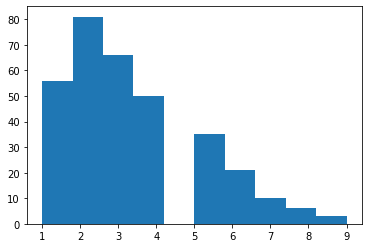

In [ ]:
plt.hist(ATD_df['3-9'])

In [ ]:
x=np.linspace(0,21,100)

In [ ]:
parm = lognorm.fit(ATD_df['14-2'].dropna())
parm

(0.6072812477419591, -0.0812172068463399, 2.7621371891829885)

In [ ]:
pdf_fitted = lognorm.pdf(x,parm[0],parm[1],parm[2])

In [ ]:
pdf_fitted

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.82485663, 0.15487532, 0.08055645, 0.05312933, 0.03909729,
       0.03065635, 0.02505638, 0.02108819, 0.0181396 , 0.01586864,
       0.01406978, 0.01261236, 0.01140943, 0.01040102, 0.00954445,
       0.00880855, 0.00817006, 0.00761127, 0.00711848, 0.00668093,
       0.00629003, 0.00593888, 0.00562187, 0.00533437, 0.00507255,
       0.00483319, 0.00461361, 0.00441152, 0.00422495, 0.00405224,
       0.00389194, 0.00374279, 0.0036037 , 0.00347372, 0.003352  ,
       0.0032378 , 0.00313046, 0.00302941, 0.00293411, 0.00284412,
       0.002759  , 0.00267838, 0.00260194, 0.00252935, 0.00246035,
       0.00239468, 0.00233212, 0.00227245, 0.00221549, 0.00216106,
       0.002109  , 0.00205916, 0.00201141, 0.00196563, 0.00192169,
       0.0018795 , 0.00183895, 0.00179996, 0.00176243, 0.0017263 ,
       0.00169148, 0.0016579 , 0.00162551, 0.00159425, 0.00156405,
       0.00153487, 0.00150666, 0.00147937, 0.00145295, 0.00142

In [ ]:
pdf_fitted[20]

0.11572973624318401

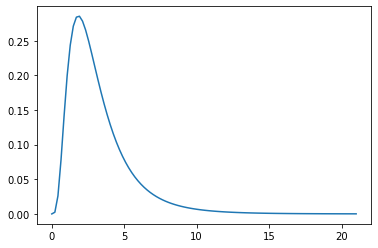

In [ ]:
plt.plot(x,pdf_fitted)

In [ ]:
datetime.datetime(2017,1,1)

datetime.datetime(2017, 1, 1, 0, 0)

In [ ]:
data_41 = data[data['user_id']==41]
(datetime.datetime(2017,1,1) - data_41[data_41['Unique_ID']=='3-9'].tail(1)['Date (mm/dd/yyyy)'].reset_index(drop=True)).dt.days

0    20
Name: Date (mm/dd/yyyy), dtype: int64

In [ ]:
#assume customer 41 go to store at 2017/1/1
probability_list = []
for item in items:
    parm = lognorm.fit(ATD_df[item].dropna())
    pdf_fitted = lognorm.pdf(x,parm[0],parm[1],parm[2])
    data_41 = data[data['user_id']==41]
    days_since_last_purchase = (datetime.datetime(2017,1,1) - data_41[data_41['Unique_ID']==item].tail(1)
                                ['Date (mm/dd/yyyy)'].reset_index(drop=True)).dt.days
    try:
        probability_item = pdf_fitted[days_since_last_purchase][0]
    except:
        probability_item = -9999
    probability_list.append(probability_item)

In [ ]:
df_41 = pd.DataFrame(probability_list, index=list(items),columns=['Probability'])
df_41

,Probability
3-9,0.126289
14-2,-9999.000000
8-4,-9999.000000
4-7,0.002450
10-3,-9999.000000
...,...
6-12,-9999.000000
7-8,-9999.000000
6-9,-9999.000000
10-8,-9999.000000


In [ ]:
df_41.sort_values('Probability').tail(5)

,Probability
14-7,0.161027
2-6,0.185203
2-3,0.229169
7-7,0.234738
7-4,0.259079
